*21/Agosto/2025*

*Ángela Valentina Bustos Giraldo* , *Mariana Montoya Torres*

<h1>RAYOS X</h1>

<h4> Objetivos </h4>


<p> El objetivo del experimento es analizar el comportamiento de los rayos X y verificar sus propiedades. Se verificó experimentalmente la ley de desplazamiento de Duane–Hunt para determinar la longitud de onda mínima y calcular la constante de Planck h. Además, se midió la atenuación de los rayos X al atravesar placas metálicas para obtener los coeficientes de absorción de cada material, se calculó el cambio de longitud de onda debido al efecto Compton y se analizó cómo varía la intensidad del espectro característico en función del voltaje y la corriente del ánodo. 
</p>

<h4> Montaje </h4> 


<p> Para cumplir los objetivos de este experimentoss se utilizó unidad de rayos X 35kV (Phywe) con un Goniómetro de
rayos X (3, cuadrado morado) se encuentra la fuente de rayos X (cuadrado azul), El objetivo (la parte en la que esta el cristal, cuadrado rojo) y el contador Geiger-Muller (cuadrado verde).Tubo de rayos X de cobre y un computador del que podemos recuperar los datos. El cristal analizador, ya sea de LiF o KBr, cumple la función de dispersar los rayos X según la ley de Bragg de modo que se puedan observar los picos característicos de emisión. Para dirigir adecuadamente el haz incidente se colocan diafragmas de distintos diámetros (1 mm para LiF y 2 mm para KBr) los cuales limitan la apertura del haz y mejoran la resolución espectral.

El tubo contador dispuesto en el extremo del goniómetro se encarga de registrar la radiación difractada por el cristal. Sus señales eléctricas se envían a la unidad básica de rayos X donde son contabilizadas y procesadas.

La unidad de control concentra los ajustes necesarios para la adquisición de los espectros. Entre sus funciones se encuentran: el modo de acoplamiento automático, la selección de tiempos de compuerta, los pasos angulares (0.1° en este caso) y el rango de escaneo (3°–55° para LiF y 3°–75° para KBr). Asimismo, desde esta unidad se regula el alto voltaje aplicado al ánodo del tubo (35 kV) y la corriente de operación (1 mA).

Finalmente, el sistema puede acoplarse a un registrador XY o a un PC mediante la conexión SUB-D, de modo que las señales analógicas correspondientes al número de cuentas y a la posición angular se representen en tiempo real facilitando la construcción del espectro de rayos X característicos de cobre.  </p>

<p align="center">
  <img src="montaje.jpg" alt="Mi imagen" width="600">
</p>


<h4>Datos de Calibración:</h4>

<p>Se utilizó un crital de LiF con una distancia (d) intermolecular de <b>201 pm</b> para el primer y segundo día de toma de datos.  </p>

<p>Respecto a los ángulos para la máxima intensidad se obtuvieron dos distintos para los dos días de toma de datos. En el primer día se obtuvo máxima intensidad en un ángulo de <b>20,9°</b> con una diferencia de 1,7° del valor esperado dado por la guía y para el segundo día se obtuvo máxima intensidad en un ángulo de <b>20,8°</b> con una diferencia de 1,8° del valor esperado. </p>

<h4> Procesamiento de toma de datos obtenidos de el PYWHE </h4>

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def leer_columnas(path_archivo):
    columnas = []

    with open(Path(path_archivo), "r", encoding="latin-1", errors="ignore") as f:
        for linea in f:
            partes = linea.strip().replace(",", ".").split()
            try:
                fila = [float(x) for x in partes]
                
                if not columnas:
                    columnas = [[] for _ in range(len(fila))]
           
                for i, val in enumerate(fila):
                    columnas[i].append(val)
            except ValueError:
                
                continue

    return columnas


<h3>Actividad 1:</h3>
<p>1. Gráficar intensidad contra longitud de onda utilizando la ley de Bragg descrita con la ecuación 2dsinθ = nλ. Realice un ajuste para todos los picos, compare entre un ajuste a una Lorentziana dada por la ecuación y un perfil Voigt.</p>


<p>Para el ajuste Lorentziano se utilizó la siguiente ecuación </p>

$$
I(\lambda) = y_{0} + \frac{A}{\pi} \cdot \frac{\gamma}{(\lambda - \lambda_{0})^{2} + \gamma^{2}}
$$
- $I(\lambda) $: intensidad  
- $y_{0}$: línea base  
- $A $: área del pico  
- $ \lambda_{0} $: posición central  
- $ \gamma $: semianchura a mitad de altura (HWHM)


<p>Para el perfil Voigt se utilizó la siguiente ecuación </p>

$$
I(\lambda) = y_{0} + A \cdot 
\frac{\Re \left[ w\!\left( \frac{\lambda - \lambda_{0} + i\gamma}{\sigma \sqrt{2}} \right) \right]}
{\sigma \sqrt{2\pi}}
$$

donde 
$$
w(z) = e^{-z^{2}} \, \mathrm{erfc}(-iz)
$$

- $y_{0} $: línea base  
- $ A $: factor de amplitud (relacionado con el área)  
- $ \lambda_{0} $: posición central del pico  
- $ \sigma $: anchura gaussiana (instrumental)  
- $\gamma $: anchura lorentziana (natural)

<h3>Actividad 1:</h3>
<p>1. Gráficar intensidad contra longitud de onda utilizando la ley de Bragg. Realice un ajuste para todos los picos, compare entre un ajuste a una Lorentziana y un perfil Voigt.</p>

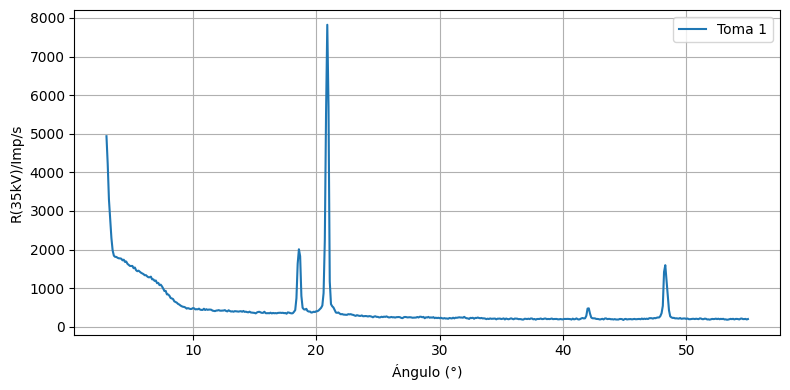

In [2]:
act_1 = np.array(leer_columnas("250821_Actividad1_RayosX_Toma1.txt"))

plt.figure(figsize=(8, 4))

plt.plot(act_1[0], act_1[1], label="Toma 1")
plt.legend()

plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.tight_layout()
plt.grid(True)

plt.show()


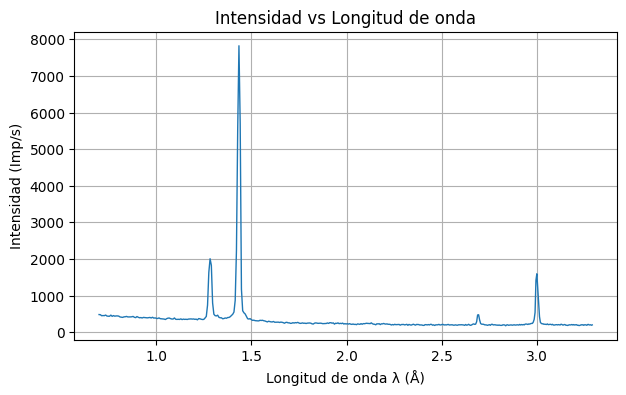

In [65]:
from scipy.constants import h, c, e

def calcular_longitud_onda(theta_grados, d=2.01e-10, n=1):
    theta_rad = np.radians(theta_grados)
    lambda_m = (2 * d * np.sin(theta_rad)) / n
    return lambda_m

def calcular_energia(longitud_onda_m):
    energia_joules = (h * c) / longitud_onda_m
    return energia_joules / e / 1e3 


lambda_m = calcular_longitud_onda(act_1[0][70:], d=2.01e-10, n=1)  
energia_keV = calcular_energia(lambda_m)

plt.figure(figsize=(7,4))
plt.plot(lambda_m*1e10, act_1[1][70:], lw=1.0)
plt.xlabel("Longitud de onda λ (Å)")
plt.ylabel("Intensidad (Imp/s)")
plt.title("Intensidad vs Longitud de onda")
plt.grid(True)
plt.show()

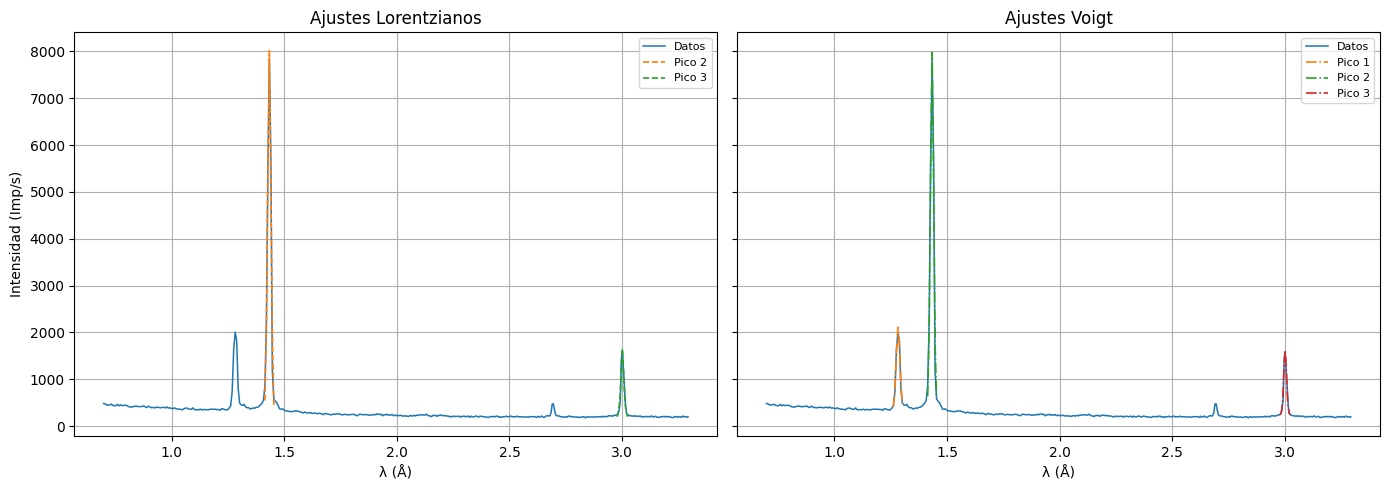

In [66]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import wofz

# --- Modelos de pico ---
def lorentziana(x, A, x0, gamma, y0):
    return y0 + (A/np.pi) * (gamma / ((x - x0)**2 + gamma**2))

def voigt(x, A, x0, sigma, gamma, y0):
    z = ((x - x0) + 1j*gamma) / (sigma*np.sqrt(2))
    V = np.real(wofz(z)) / (sigma*np.sqrt(2*np.pi))
    return y0 + A*V

def ajustar_pico(xw, yw, modelo, x0_init=None):
    y0 = np.median(yw)
    if x0_init is None:
        x0_init = xw[np.argmax(yw)]
    rango = max(xw.max()-xw.min(), 1e-9)
    fwhm_guess = max(rango/20, 1e-6)
    gamma0 = max(fwhm_guess/2, 1e-6)
    sigma0 = max(fwhm_guess/(2*np.sqrt(2*np.log(2))), 1e-6)

    if modelo == "lorentz":
        A0 = max((yw.max()-y0)*np.pi*gamma0, 1e-12)
        p0 = [A0, x0_init, gamma0, y0]
        bounds = ([0, xw.min(), 1e-9, -np.inf],
                  [np.inf, xw.max(), np.inf, np.inf])
        f = lorentziana
    elif modelo == "voigt":
        A0 = max((yw.max()-y0), 1e-12)
        p0 = [A0, x0_init, sigma0, gamma0, y0]
        bounds = ([0, xw.min(), 1e-9, 1e-9, -np.inf],
                  [np.inf, xw.max(), np.inf, np.inf, np.inf])
        f = voigt
    else:
        raise ValueError("modelo debe ser 'lorentz' o 'voigt'")
    popt, pcov = curve_fit(f, xw, yw, p0=p0, bounds=bounds, maxfev=20000)
    yfit = f(xw, *popt)
    return popt, yfit, f

lambda_A = lambda_m * 1e10            
R_slice  = np.asarray(act_1[1][70:], float)

ord_idx = np.argsort(lambda_A)
lam = lambda_A[ord_idx]
R   = R_slice[ord_idx]

# Detectar picos
prominencia_frac = 0.05
prom_abs = max(prominencia_frac*(R.max()-R.min()), 1e-12)
peaks, _ = find_peaks(R, prominence=prom_abs)

# Ventana de ajuste
ventana_frac = 0.01
lam_range = lam.max() - lam.min()
ancho = max(ventana_frac*lam_range, 1e-6)


fig, ax = plt.subplots(1, 2, figsize=(14,5), sharey=True)
ax[0].plot(lam, R, lw=1.1, label="Datos")
for i, p in enumerate(peaks, start=1):
    x0 = lam[p]
    m = (lam >= x0 - ancho) & (lam <= x0 + ancho)
    xw, yw = lam[m], R[m]
    try:
        poptL, yfitL, _ = ajustar_pico(xw, yw, "lorentz", x0_init=x0)
        ax[0].plot(xw, yfitL, '--', lw=1.2, label=f"Pico {i}")
    except:
        continue
ax[0].set_xlabel("λ (Å)")
ax[0].set_ylabel("Intensidad (Imp/s)")
ax[0].set_title("Ajustes Lorentzianos")
ax[0].legend(fontsize=8)
ax[0].grid(True)

ax[1].plot(lam, R, lw=1.1, label="Datos")
for i, p in enumerate(peaks, start=1):
    x0 = lam[p]
    m = (lam >= x0 - ancho) & (lam <= x0 + ancho)
    xw, yw = lam[m], R[m]
    try:
        poptV, yfitV, _ = ajustar_pico(xw, yw, "voigt", x0_init=x0)
        ax[1].plot(xw, yfitV, '-.', lw=1.2, label=f"Pico {i}")
    except:
        continue
ax[1].set_xlabel("λ (Å)")
ax[1].set_title("Ajustes Voigt")
ax[1].legend(fontsize=8)
ax[1].grid(True)

plt.tight_layout()
plt.show()



<h4> <b>Conclusiones preliminares</b> </h4>

<p> <b>Objetivo:</b> Con esta actividad, se busca identificar los picos de radiación característica del ánodo. En este momento desconocemos si hay aplicaciones u otras interpretaciones que deberíamos considerar para el informe.</p>

<b>Reflexión general de las gráficas: </b>  

<p> En la primera imagen, se graficó Ángulo del Cristal (°) vs R (35kv/Imp/s) se puede ver cuatros líneas relacionadas con las transiciones para la producción de Rayos X característicos. Dónde las primeras son el decaimiento en n=1 y las otras dos será n =2. Por otro lado, no conocemos a que corresponde la intensidad entre los ángulos 0 y 10. Debido a esta razón fueron excluidos para los ajustes y gráficas posteriores hasta poder reconocer la función de esos datos. </p>

<p>Para la segunda se graficó intensidad y longitud de onda obtenido de la ecuación de Bragg. Aún no tenemos en cuenta los ajustes a los picos comparación entre un ajuste lorentziano y un perfil Vogit. </p>

<p> En la tercera se graficó intensidad y longitud de onda obtenido de la ecuación de Bragg. Dónde tuvimos el ajuste de los picos dado por un ajuste Lorentziano y otro por el ajuste de perfil de Voigt sin la seguridad de que estuviera bien acorde a la literatura o si estuvieron demasiado adecuados para nuestros datos. Luego de esto se pudo reconocer que el perfil de Voigt es más preciso al integrar un pico adicional en comparación del ajuste Lorentziano. Dónde aún no tuvimos en cuenta residuales del ajuste pero preguntaremos si es relevante.</p>

<p> 2. Calcular las energías del espectro característico utilizando la ecuación </p>
<p> 3. ¿Hasta que valor de angulo puede usar n = 1? En que rango de angulos debe usar n =2?</p>

<h4> Conclusiones iniciales </h4>

<p> </p>
<p>En la primera imagen, se graficó Ángulo del Cristal (°) vs R (35kv/Imp/s) se puede ver cuatros líneas relacionadas con las transiciones para la producción de Rayos X característicos.  Dónde las primeras son el decaimiento con n=1 y las otras dos será n =2. Por otro lado, no conocemos a que corresponde la intensidad entre los ángulos 0 y 10. Debido a esta razón fueron excluidos para los ajustes y gráficas posteriores hasta poder reconocer la función de esos datos. </p>

<p>Para la segunda se graficó intensidad y longitud de onda obtenido de la ecuación de Bragg. </p>

<h3> Actividad 2:</h3>

La absorción de los rayos X usando la relación μ/ρ . A lo largo de la práctica se varía el espesor de cada material, Al y Zn en este caso.


<p>Ángulo Intensidad Máxima : 20,9 °. d del LiF = 201 pm. Con unos absorvedores de Al de 0,1 mm, 0,08 mm y 0,06 mm ,para la primera toma de datos.</p>

<p> Ángulo Intensidad Máxima : 20,7°. d del LiF = 201 pm. Con unos absorvedores de Al de 0,02 mm y 0,04 mm; Zn de 0,075 mm, 0,025nm. para la segunda toma de datos</p> 

In [43]:
act_2_1 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida1.txt") # Al 0,1 mm 
act_2_2  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida2.txt")  #Al 0,08 mm
act_2_3  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida3.txt")  #Al 0,06 mm
act_2_4 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida4.txt")  #Al 0,02 mm
act_2_5 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida5.txt")  #Al 0,04 mm

act_2_6 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida6.txt")  #Zn 0,075 mm
act_2_7 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida7.txt")  #Zn 0,025 mm


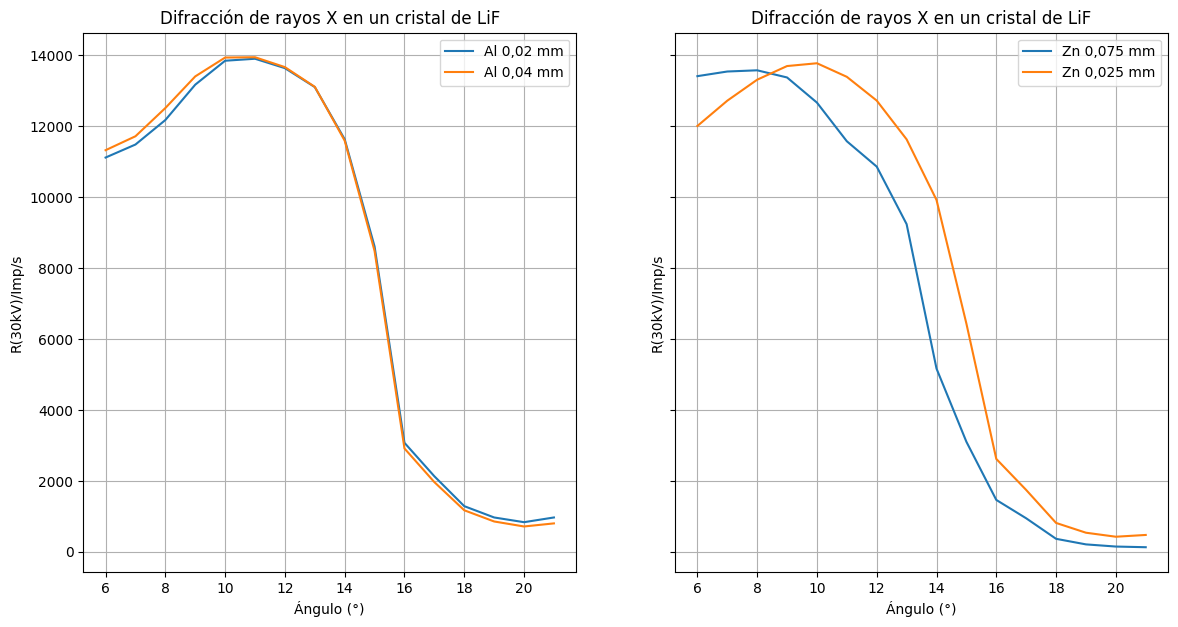

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7), sharey=True)

ax1.set_xlabel("Ángulo (°)")
ax1.set_ylabel("R(30kV)/Imp/s")
ax1.set_title("Difracción de rayos X en un cristal de LiF")
ax1.grid(True)
ax1.plot(act_2_4[0], act_2_4[1], label="Al 0,02 mm")
ax1.plot(act_2_5[0], act_2_5[1], label="Al 0,04 mm")
ax1.legend()    

ax2.set_xlabel("Ángulo (°)")
ax2.set_ylabel("R(30kV)/Imp/s")
ax2.set_title("Difracción de rayos X en un cristal de LiF")
ax2.grid(True)
ax2.plot(act_2_6[0], act_2_6[1], label="Zn 0,075 mm")
ax2.plot(act_2_7[0], act_2_7[1], label="Zn 0,025 mm")
ax2.legend()    


Gráfica de regresiones logaritmicas de Intensidad contra espesor para AI y Zn

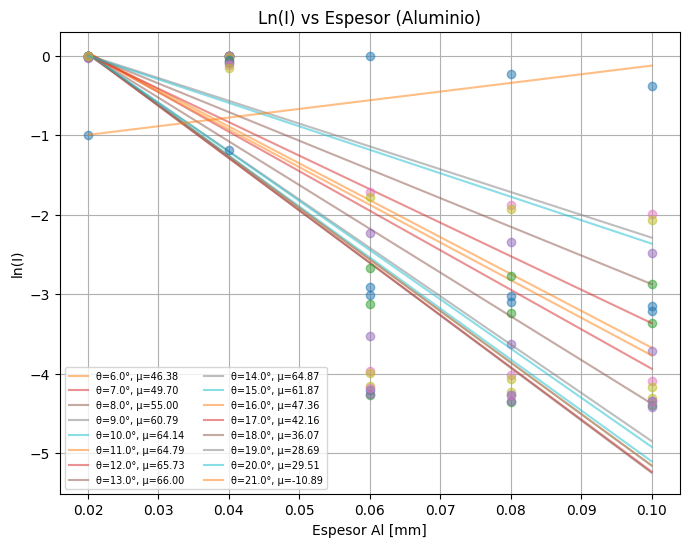

C:\Users\user\AppData\Local\Temp\ipykernel_20732\3805721064.py:55: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)


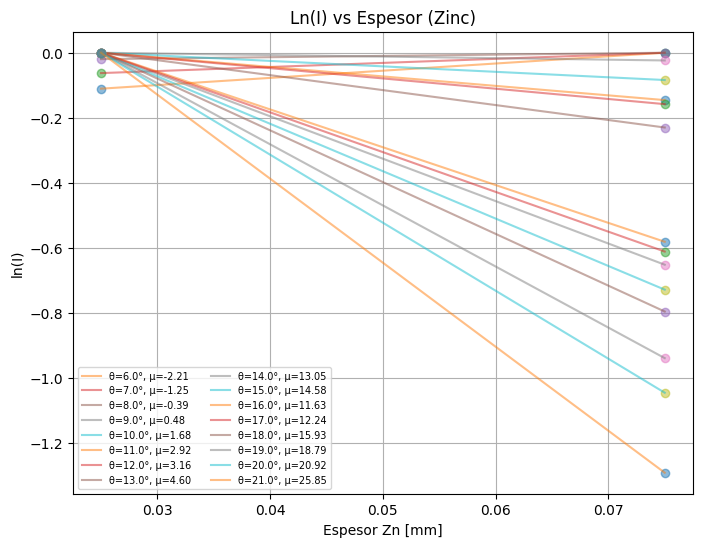

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b   # a = -μ , b = ln(I0)

# --------------------------
# Espesores y datos
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]

espesores_Zn = np.array([0.075, 0.025])  # mm
datos_Zn = [act_2_6, act_2_7]

thetas = datos_Al[0][0]   # primera columna = ángulos

# --------------------------
# Graficar todas juntas - ALUMINIO
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):  # evitar problemas con log(0)
        popt, _ = curve_fit(linear, espesores_Al, lnI_al)
        fit = linear(espesores_Al, *popt)
        plt.plot(espesores_Al, lnI_al, "o", alpha=0.5)
        plt.plot(espesores_Al, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Al [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Aluminio)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()

# --------------------------
# Graficar todas juntas - ZINC
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_zn = np.array([np.interp(th, d[0], d[1]) for d in datos_Zn])
    I_zn = I_zn / np.max(I_zn)
    lnI_zn = np.log(I_zn)

    if np.all(np.isfinite(lnI_zn)) and len(espesores_Zn) >= 2:
        popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)
        fit = linear(espesores_Zn, *popt)
        plt.plot(espesores_Zn, lnI_zn, "o", alpha=0.5)
        plt.plot(espesores_Zn, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Zn [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Zinc)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()


Tablas con incertidumbre de AI y Zn

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b

# --------------------------
# Ejemplo con Aluminio
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]
thetas = datos_Al[0][0]

rows = []
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):
        popt, pcov = curve_fit(linear, espesores_Al, lnI_al)
        slope, intercept = popt
        perr = np.sqrt(np.diag(pcov))   # incertidumbres
        slope_err = perr[0]

        # Calcular R^2
        y_fit = linear(espesores_Al, *popt)
        ss_res = np.sum((lnI_al - y_fit) ** 2)
        ss_tot = np.sum((lnI_al - np.mean(lnI_al)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        rows.append({
            "Data": f"I{i+1}",
            "Pendiente (a)": slope,
            "Incertidumbre": slope_err,
            "R²": r2
        })


df = pd.DataFrame(rows)
df["Pendiente (a)"] = df["Pendiente (a)"].map(lambda x: f"{x:.5f}")
df["Incertidumbre"] = df["Incertidumbre"].map(lambda x: f"±{x:.5f}")
df["R²"] = df["R²"].map(lambda x: f"{x:.5f}")

print(df)


df.to_csv("tabla_resultados.csv", index=False)


   Data Pendiente (a) Incertidumbre       R²
0    I1     -46.37790     ±13.96857  0.78607
1    I2     -49.69741     ±15.02398  0.78482
2    I3     -55.00385     ±17.17066  0.77378
3    I4     -60.79381     ±19.52012  0.76377
4    I5     -64.14254     ±20.39051  0.76736
5    I6     -64.79231     ±20.65336  0.76638
6    I7     -65.73109     ±21.06593  0.76445
7    I8     -66.00424     ±20.91466  0.76851
8    I9     -64.86547     ±20.51237  0.76923
9   I10     -61.87493     ±19.43958  0.77153
10  I11     -47.36461     ±14.29933  0.78528
11  I12     -42.15983     ±12.48755  0.79164
12  I13     -36.07059     ±10.07651  0.81030
13  I14     -28.69240      ±7.31114  0.83697
14  I15     -29.51215      ±7.36799  0.84247
15  I16      10.89201      ±6.84350  0.45781


Exponente p = -0.945 ± 0.479


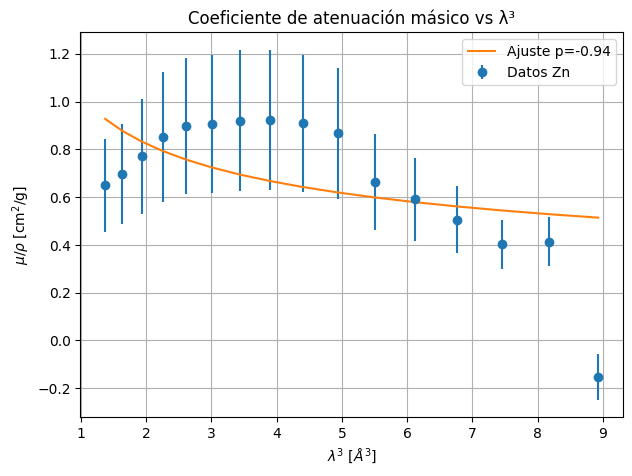

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Datos (pendientes en 1/mm)
mu_mm = np.array([
 -46.37790, -49.69741, -55.00385, -60.79381, -64.14254, -64.79231, 
 -65.73109, -66.00424, -64.86547, -61.87493, -47.36461, -42.15983, 
 -36.07059, -28.69240, -29.51215,  10.89201
])

# Ángulos asociados (ejemplo: 16° a 31°, ajustar con tus valores reales)
thetas_deg = np.arange(16, 32)  

# --------------------------
# Conversión de unidades
mu_cm = -mu_mm * 0.1   # pasar a 1/cm y signo positivo
rho_Zn = 7.14          # g/cm^3 (cambia a Al si es el caso)
mu_rho = mu_cm / rho_Zn

# --------------------------
# Cálculo de λ y λ³
d = 201.4e-12  # m (ejemplo: NaCl)
thetas = np.radians(thetas_deg)
lambda_vals = 2*d*np.sin(thetas)   # en m
lambda_A = lambda_vals*1e10        # en Å
lambda_cub = lambda_A**3

# --------------------------
# Ajuste en escala log-log
def modelo(x, C, p):
    return C * (x**p)

popt, pcov = curve_fit(modelo, lambda_A, mu_rho, maxfev=5000)
C_fit, p_fit = popt
p_err = np.sqrt(np.diag(pcov))[1]

print(f"Exponente p = {p_fit:.3f} ± {p_err:.3f}")

# Incertidumbre en 1/mm (de tu tabla)
err_mm = np.array([
  13.96857, 15.02398, 17.17066, 19.52012, 20.39051, 20.65336, 21.06593, 20.91466,
  20.51237, 19.43958, 14.29933, 12.48755, 10.07651,  7.31114,  7.36799,  6.84350
])

# Convertir a 1/cm
err_cm = err_mm * 0.1

# Pasar a error de mu/rho
err_mu_rho = err_cm / rho_Zn




# --------------------------
# Gráfica
plt.figure(figsize=(7,5))
plt.errorbar(lambda_cub, mu_rho, yerr=err_mu_rho, fmt="o", label="Datos Zn")
plt.plot(lambda_cub, modelo(lambda_A, *popt), "-", label=f"Ajuste p={p_fit:.2f}")
plt.xlabel(r"$\lambda^3$ [$\AA^3$]")
plt.ylabel(r"$\mu / \rho$ [cm$^2$/g]")
plt.title("Coeficiente de atenuación másico vs λ³")
plt.legend()
plt.grid(True)
plt.show()


Conclusiones de este resultado:  
No se obtiene la recta esperada, significando que En lugar de una dependencia cúbica, el ajuste arroja un exponente cercano a -0.94 indicando que el coeficiente de atenuación másico decrece aproximadamente como lambda^-1 difiriendo del valor teórico. Este error se produce debido a dispersión en la geometría de medición, fluorescencia, o no linealidad del detector pueden sumar señal no atenuada. Desde el punto de vista energético, las longitudes de onda medidas pueden situar al experimento en una región donde la interacción Compton u otros procesos contribuyen significativamente.

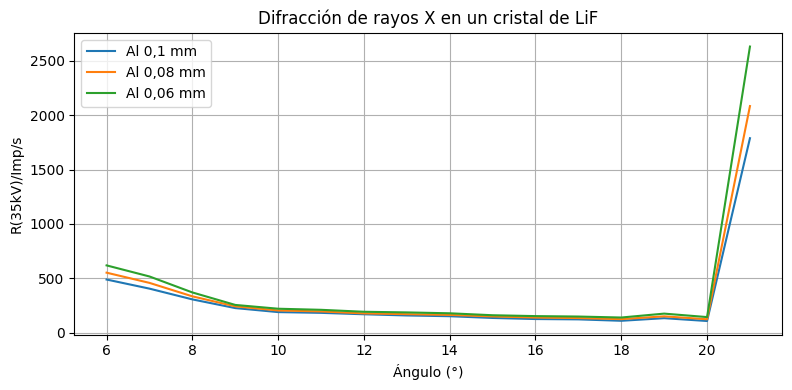

In [48]:
plt.figure(figsize=(8, 4))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_2_1[0], act_2_1[1], label="Al 0,1 mm ")
plt.plot(act_2_2[0], act_2_2[1], label="Al 0,08 mm")
plt.plot(act_2_3[0], act_2_3[1], label="Al 0,06 mm")
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>

Hehe

<h3>Actividad 3: </h3>

<p> 1. Se variar el voltaje de (11,35) kV variando de a 2kV, corriente (una se deja constante) con el valor de 1mA y con ángulo variante entre (19°,24°) con un aumento de 0,1°.</p>

<p> 2. Se variar la corriente (0,1,1)mA variando de a 0,1 mA, un voltaje constante de 35 kV y con ángulo variante entre (19°,24°) con un aumento de 0,1°. </p>

In [49]:
act_3_1 = leer_columnas("250821_Actividad3_RayosX_Toma1.txt") # Voltaje Variando
act_3_2 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida1.txt") # Corriente Variando 0,1 mA
act_3_3 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida2.txt") # Corriente Variando 0,5 mA
act_3_4 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida3.txt") # Corriente Variando 0, 8mA

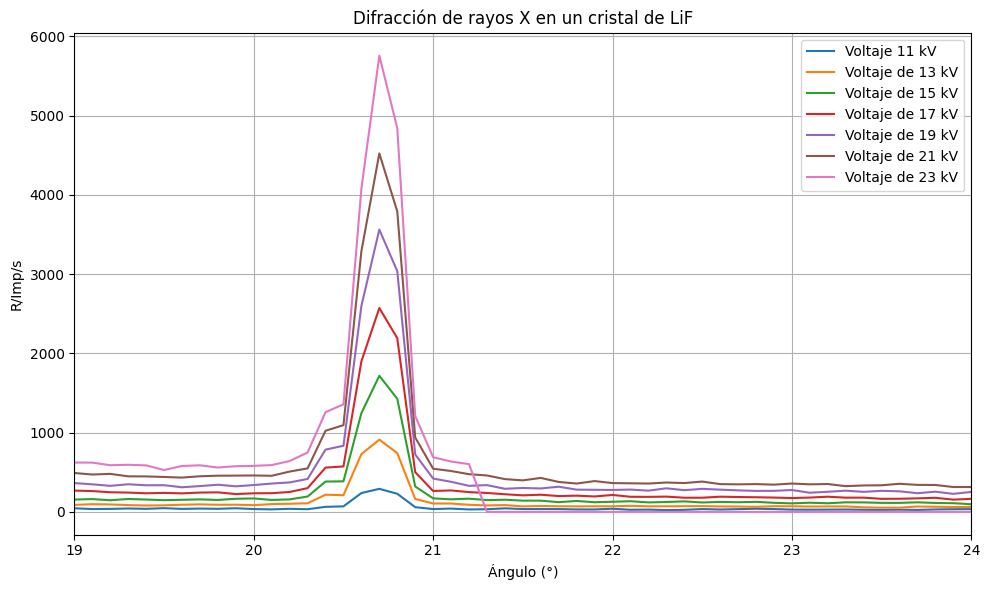

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(act_3_1[0], act_3_1[1], label="Voltaje 11 kV")
plt.plot(act_3_1[0], act_3_1[2], label="Voltaje de 13 kV")
plt.plot(act_3_1[0], act_3_1[3], label="Voltaje de 15 kV")
plt.plot(act_3_1[0], act_3_1[4], label="Voltaje de 17 kV")
plt.plot(act_3_1[0], act_3_1[5], label="Voltaje de 19 kV")
plt.plot(act_3_1[0], act_3_1[6], label="Voltaje de 21 kV")
plt.plot(act_3_1[0], act_3_1[7], label="Voltaje de 23 kV")
#plt.plot(act_3_1[0], act_3_1[8], label="Voltaje de 25 kV")
#plt.plot(act_3_1[0], act_3_1[9], label="Voltaje de 27 kV")
#plt.plot(act_3_1[0], act_3_1[10], label="Voltaje de 29 kV")
#plt.plot(act_3_1[0], act_3_1[11], label="Voltaje de 31 kV")
#plt.plot(act_3_1[0], act_3_1[12], label="Voltaje de 33 kV")
#plt.plot(act_3_1[0], act_3_1[13], label="Voltaje de 35 kV")

plt.xlim(19,24)
plt.title("Difracción de rayos X en un cristal de LiF")
plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

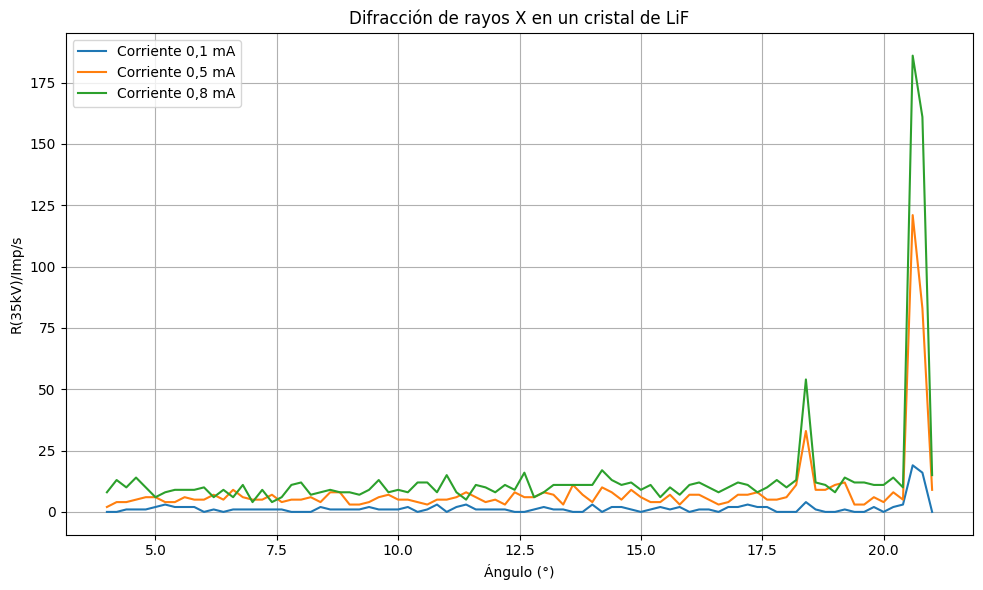

In [51]:
plt.figure(figsize=(10, 6))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_3_2[0], act_3_2[1], label="Corriente 0,1 mA")
plt.plot(act_3_3[0], act_3_3[1], label="Corriente 0,5 mA")
plt.plot(act_3_4[0], act_3_4[1], label="Corriente 0,8 mA")
plt.legend()
plt.show()



<h4> Conclusiones iniciales </h4>

La gráfica de voltaje variante y corriente constante se descartaron los voltajes de 25 kV al 35 kV ya que no aportaban información valiosa al ser constantemente 0.

<h3>Actividad 4: </h3>
<p> Para esta parte de la práctica se comprueba la ley de Duane - Hunt hallando la longitud de onda mínima en la cuál se da el efecto de Bremsstrah-lung. </p>

<p>Ángulo variante de (4,21)°, voltaje variante (13, 35) kV con pasos de 2kV y corriente 1mA fija. </p>

In [51]:
act_4_1 = leer_columnas("250821_Actividad4_RayosX_Toma1.txt")

Longitud onda mínima

In [52]:
# Constante de LiF
d = 0.2014  # nm

# Tensiones y columnas de tu archivo
tensiones = np.array([13, 15, 17, 19])  # kV
columnas = [1, 2, 3, 4]

lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]
    idx_max = np.argmax(intensidades)
    theta_max = theta[idx_max]
    lambda_min.append(2*d*np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)

# Mostrar resultados
for U, lm in zip(tensiones, lambda_min):
    print(f"U = {U} kV -> λ_min experimental = {lm:.4f} nm")

U = 13 kV -> λ_min experimental = 0.1430 nm
U = 15 kV -> λ_min experimental = 0.1417 nm
U = 17 kV -> λ_min experimental = 0.1417 nm
U = 19 kV -> λ_min experimental = 0.1417 nm


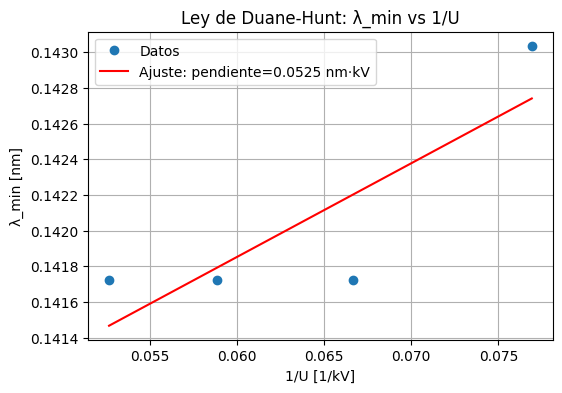

Pendiente de la recta: 0.0525 nm·kV


In [59]:


# --------------------------
# Leer archivo manualmente (evita problemas de leer_columnas)
# --------------------------
datos = []
with open("250821_Actividad4_RayosX_Toma1.txt", "r", encoding="utf-8") as f:
    next(f)  # saltar primera línea de encabezado
    next(f)  # saltar segunda línea de encabezado
    for line in f:
        line = line.strip()
        if not line:
            continue
        # separar por tab o espacio
        parts = line.replace(',', '.').split()  # reemplaza ',' por '.'
        fila = [float(p) for p in parts]
        datos.append(fila)

act_4_1_array = np.array(datos)  # ahora es un array de floats

# --------------------------
# Tensiones y columnas
# --------------------------
tensiones = np.array([13, 15, 17, 19])  # kV
columnas = [1, 2, 3, 4]                 # columnas correspondientes

d = 0.2014  # nm

# --------------------------
# Calcular λ_min para cada tensión
# --------------------------
lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]  # ángulo
    idx_max = np.argmax(intensidades)  # índice de máximo
    theta_max = theta[idx_max]
    lambda_min.append(2 * d * np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)
U_inv = 1 / tensiones

# --------------------------
# Graficar y ajustar pendiente
# --------------------------
plt.figure(figsize=(6,4))
plt.plot(U_inv, lambda_min, 'o', label='Datos')
coef = np.polyfit(U_inv, lambda_min, 1)
plt.plot(U_inv, np.polyval(coef, U_inv), 'r-', label=f'Ajuste: pendiente={coef[0]:.4f} nm·kV')
plt.xlabel('1/U [1/kV]')
plt.ylabel('λ_min [nm]')
plt.title('Ley de Duane-Hunt: λ_min vs 1/U')
plt.legend()
plt.grid(True)
plt.show()

print(f'Pendiente de la recta: {coef[0]:.4f} nm·kV')


Pendiente: 5.247e-08 ± 2.428e-08 m·V
Intercepto: 1.387e-10 ± 1.564e-12 m


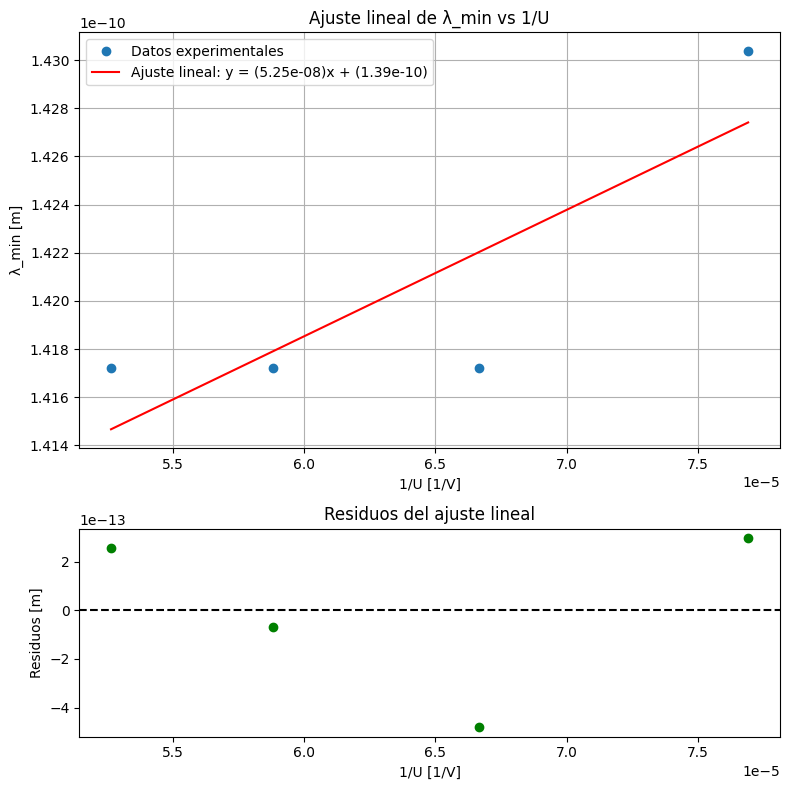

In [61]:
def linear_function(X, a, b):
    return a * X + b

lambda_min = []

for col in columnas:
    intensidades = act_4_1_array[:, col]
    theta = act_4_1_array[:, 0]
    idx_max = np.argmax(intensidades)
    theta_max = theta[idx_max]
    lambda_min.append(2 * d * np.sin(np.radians(theta_max)))

lambda_min = np.array(lambda_min)

# Convertir λ_min a metros para la constante de Planck
lambda_min_m = lambda_min * 1e-9

# Variable independiente x = 1/U (en V)
U = tensiones * 1e3
x = 1 / U
y = lambda_min_m
popt, pcov = curve_fit(linear_function, x, y)

slope = popt[0]
intercept = popt[1]
slope_std_err = np.sqrt(pcov[0,0])
intercept_std_err = np.sqrt(pcov[1,1])

# --------------------------
# Calcular h
# --------------------------
e = 1.602e-19  # C
c = 3e8        # m/s
h_calculado = slope * e / c

print(f"Pendiente: {slope:.3e} ± {slope_std_err:.3e} m·V")
print(f"Intercepto: {intercept:.3e} ± {intercept_std_err:.3e} m")


# --------------------------
# Graficar con residuos
# --------------------------
Y_pred = linear_function(x, *popt)
residuals = y - Y_pred

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios':[2,1]})

# Datos con ajuste
ax1.plot(x, y, 'o', label='Datos experimentales')
ax1.plot(x, Y_pred, 'r-', label=f'Ajuste lineal: y = ({slope:.2e})x + ({intercept:.2e})')
ax1.set_xlabel('1/U [1/V]')
ax1.set_ylabel('λ_min [m]')
ax1.legend()
ax1.grid(True)
ax1.set_title('Ajuste lineal de λ_min vs 1/U')

# Residuos
ax2.scatter(x, residuals, color='green')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('1/U [1/V]')
ax2.set_ylabel('Residuos [m]')
ax2.set_title('Residuos del ajuste lineal')

plt.tight_layout()
plt.show()

Conclusiones de este resultado: lambda minimo si cumple con ser proporcional a 1/U y la pendiente permite estimar la constante de planck, pero el valor para h da menor al valor teórico 

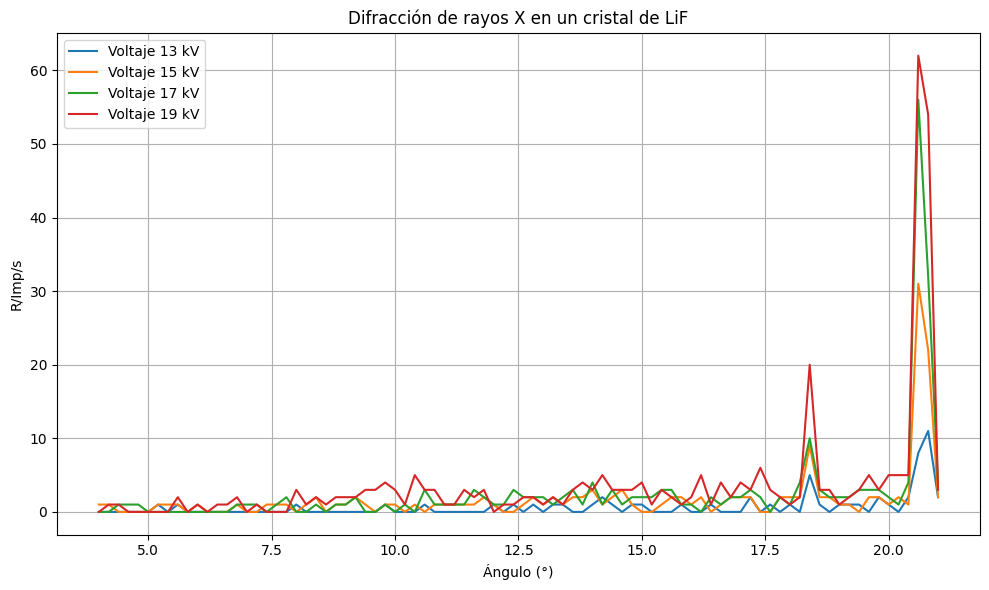

In [53]:
plt.figure(figsize=(10, 6))

plt.plot(act_4_1[0], act_4_1[1], label="Voltaje 13 kV")
plt.plot(act_4_1[0], act_4_1[2], label="Voltaje 15 kV")
plt.plot(act_4_1[0], act_4_1[3], label="Voltaje 17 kV")
plt.plot(act_4_1[0], act_4_1[4], label="Voltaje 19 kV")
#plt.plot(act_4_1[0], act_4_1[5], label="Voltaje 21 kV")
#plt.plot(act_4_1[0], act_4_1[6], label="Voltaje 23 kV")
#plt.plot(act_4_1[0], act_4_1[7], label="Voltaje 25 kV")
#plt.plot(act_4_1[0], act_4_1[8], label="Voltaje 27 kV")
#plt.plot(act_4_1[0], act_4_1[9], label="Voltaje 29 kV")
#plt.plot(act_4_1[0], act_4_1[10], label="Voltaje 31 kV")
#plt.plot(act_4_1[0], act_4_1[11], label="Voltaje 33 kV")
#plt.plot(act_4_1[0], act_4_1[12], label="Voltaje 35 kV") 

plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>


Se descartó los voltaje del 21kV a 35 kV debido a que no  aportaba información valiosa al ser constantemente 0. 

__________________________________________________________________________________________________________________________________
<h4> Conclusiones finales de la bitácora</h4> 

<p> Hay ajustes que no son convincentes y que se tratarán el lunes con el docente . </p>